In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_data
from node import get_node_data
import pandas as pd
import numpy as np

In [3]:
raw_data = read_data()
# nodes = {"pi"+str(i+2):i for i in range(4)}
nodes = ["pi2", "pi3", "pi4", "pi5"]

In [4]:
data = {}
sample_sizes = []
for experiment in range(1,4):
    node_data, models, inliers = get_node_data(raw_data, experiment, return_models=True)
    min_samples = min([d.shape[0] for d in node_data])
    m = int(min_samples/2)
    sample_sizes.append(m)
    for i in range(4):
        node_data[i] = node_data[i].sample(m).reset_index(drop=True)
    data[experiment] = {"sampled_data" : node_data, "models" : models, "inliers" : inliers, "raw_data" : raw_data}

## Visualising Data

In [15]:
from visualising import visualise_experiments
# visualise_experiments(data)

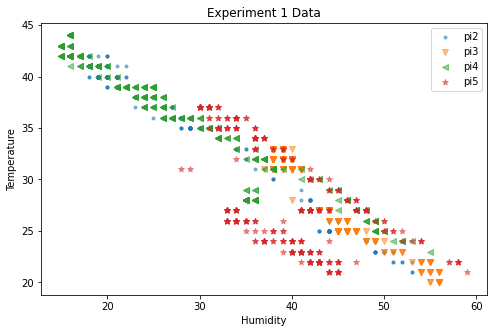

In [16]:
from visualising import visualise_experiment
visualise_experiment(data[1]["sampled_data"])

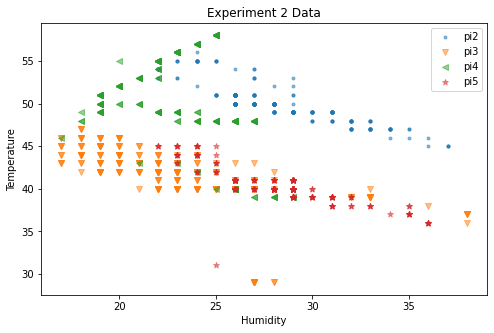

In [17]:
visualise_experiment(data[2]["sampled_data"])

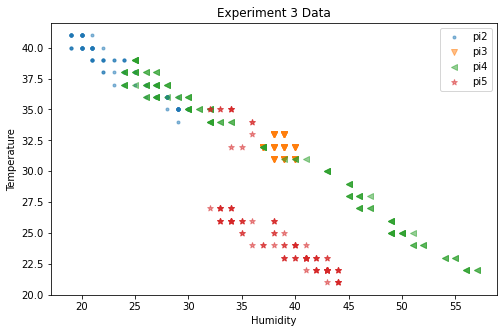

In [18]:
visualise_experiment(data[3]["sampled_data"])

## Similarity MMD

In [19]:
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
from prettytable import PrettyTable

def bandwidth_experiment(samples, similar_nodes, other_nodes, bandwidths, kernel):
    print(kernel.upper(), "\n")
    t = PrettyTable(['Bandwidth', 'Similarity MMD', 'Dissimilarity MMD'])
    for bandwidth in bandwidths:
        avg_sim_mmd, avg_dis_mmd, s, d = ASDMMD(samples, similar_nodes, other_nodes, kernel, bandwidth)
        t.add_row([bandwidth, avg_sim_mmd, avg_dis_mmd])
        print(s)
        print(d)
        print()
        
    print(t)
    print()

### Experiment 1

Nodes pi2 and pi4 are similar according to mmd and nodes pi3 and pi5 are similar to each other but not to the others

In [20]:
from maximum_mean_discrepancy import get_tensor_samples
tensor_samples = get_tensor_samples(data[1]["sampled_data"], sample_size=sample_sizes[0])

In [21]:
similar_nodes = ["pi2","pi4"]
other_nodes = ["pi3","pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1, 10, 5), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi2', 'pi4') | 1.0924835205078125 |
+----------------+--------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') | 30.894882202148438 |
| ('pi3', 'pi4') |     30.5234375     |
| ('pi5', 'pi2') | 23.235092163085938 |
| ('pi5', 'pi4') | 22.887481689453125 |
| ('pi3', 'pi5') | 2.518035888671875  |
+----------------+--------------------+

+----------------+------------------+
|     Nodes      |   Similar MMD    |
+----------------+------------------+
| ('pi2', 'pi4') | 3.27752685546875 |
+----------------+------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
| ('pi3', 'pi2') | 92.68463134765625 |
| ('pi3', 'pi4') |     91.5703125    |
| ('pi5', 'pi2') |  69.705322265625  |
| ('pi

similar_sets = ["pi3", "pi5"]
dissimilar_sets = ["pi2", "pi4"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1, 10, 5), "rbf")

### Experiment 3

Nodes pi3, pi4, pi5 are dissimilar with pi2. Nodes pi3 and pi4 are similar to each other and similar to pi5.

In [23]:
tensor_samples = get_tensor_samples(data[3]["sampled_data"], sample_size=sample_sizes[2])

In [24]:
similar_nodes = ["pi2", "pi4"]
other_nodes = ["pi3", "pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1,5 , 4), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi2', 'pi4') | 25.450576782226562 |
| ('pi3', 'pi4') | 4.4707183837890625 |
| ('pi5', 'pi4') | 8.926605224609375  |
| ('pi3', 'pi5') | 9.129928588867188  |
+----------------+--------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') | 29.163543701171875 |
| ('pi5', 'pi2') | 43.03852844238281  |
+----------------+--------------------+

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi2', 'pi4') | 76.35186767578125 |
| ('pi3', 'pi4') |  13.4122314453125 |
| ('pi5', 'pi4') | 26.77984619140625 |
| ('pi3', 'pi5') | 27.38970947265625 |
+----------------+-------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
|

similar_sets = ["pi2", "pi3", "pi4"]
dissimilar_sets = ["pi5"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1,5 , 4), "rbf")

### Experiment 2

In [25]:
tensor_samples = get_tensor_samples(data[2]["sampled_data"], sample_size=sample_sizes[1])

In [26]:
similar_nodes = ["pi3", "pi5"]
other_nodes = ["pi2", "pi4"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(5,100 , 5), "rbf")

LINEAR 

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi3', 'pi5') | 4.380279541015625 |
+----------------+-------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi2', 'pi3') | 12.232162475585938 |
| ('pi2', 'pi5') | 11.631454467773438 |
| ('pi4', 'pi3') | 12.050918579101562 |
| ('pi4', 'pi5') | 16.890335083007812 |
| ('pi2', 'pi4') | 5.491302490234375  |
+----------------+--------------------+

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi3', 'pi5') | 13.14080810546875 |
+----------------+-------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
| ('pi2', 'pi3') | 36.69635009765625 |
| ('pi2', 'pi5') |   34.89404296875  |
| ('pi4', 'pi3') | 36.15289306640625 |
| ('pi

## Testing Hypothesis

In [5]:
from modelling import grid_search_models, fit_clf, score_clf, select_model_data  
from similar import get_similar_pairs_nodes

def test_in_pairs(similar_pairs, model_data, models):
    l = []
    for pair in similar_pairs:
        x = model_data[pair[0]]
        y = model_data[pair[1]]
        
        model_x = models[pair[0]]
        ex = fit_clf(model_x, x)
        exy = score_clf(model_x, y)

        model_y = models[pair[1]]
        ey = fit_clf(model_y, y)
        eyx = score_clf(model_y, x)       
        
        l.append(pd.DataFrame([{"model_node" : pair[0], "test_node" : pair[1], "discrepancy" : abs(ex-exy)}]))
        l.append(pd.DataFrame([{"model_node" : pair[1], "test_node" : pair[0], "discrepancy" : abs(ey-eyx)}]))
    return pd.concat(l, ignore_index = True)

def test_hypothesis(clf_name, model_data, similar_pairs, similar_nodes): 
    models, models_df = grid_search_models(clf_name, model_data, similar_nodes)
    test_df = test_in_pairs(similar_pairs, model_data, models)
    return models_df.merge(test_df, how='outer', on='model_node')
    
def test_hypothesis_all_clfs(experiment, method, similar_pairs, similar_nodes, standardised):
    model_data = select_model_data(data[experiment]["sampled_data"], similar_nodes, standardised)
    svr_df = test_hypothesis("svr", model_data, similar_pairs, similar_nodes)
    lsvr_df = test_hypothesis("lsvr", model_data, similar_pairs, similar_nodes)
    lreg_df = test_hypothesis("lreg", model_data, similar_pairs, similar_nodes)
    
    df = pd.concat([svr_df, lsvr_df, lreg_df], ignore_index = True)
    df["method"] = [method] * df.shape[0]
    df["std"] = [standardised] * df.shape[0]
    
    return df

def test_hypothesis_method_all_clfs(experiment, method, similar_pairs, similar_nodes):
    l = []
    print(f"Testing method with normal data", end="")
    for standardised in [False, True]:
        if standardised:
            print(f" and standardised data", end = "\n")
        df = test_hypothesis_all_clfs(experiment, method, similar_pairs, similar_nodes, standardised)
        l.append(df)
    
    df = pd.concat(l, ignore_index = True)
    df["experiment"] = [experiment] * df.shape[0]
    
    return df

In [6]:
def get_results(similar_pairs, similar_nodes, thresholds):
    results= []
    for method, pairs in similar_pairs.items():
        print(f"{method}: {pairs}", end =" ")
        df = test_hypothesis_method_all_clfs(experiment, method, pairs, similar_nodes[method])
        df["threshold"] = [0] * df.shape[0]
        
        if method in ["OCSVM", "MMD OCSVM Verify"]:
            for pair_index in range(len(pairs)):
                pair = pairs[pair_index]
                threshold_value = thresholds[method][pair_index]
                df.loc[((df.model_node==pair[0])&(df.test_node==pair[1])), "threshold"] = round(threshold_value[0], 2)
                df.loc[((df.model_node==pair[1])&(df.test_node==pair[0])), "threshold"] = round(threshold_value[1], 2)
        else:
            df["threshold"] = round(thresholds[method],2)

        results.append(df)
    print()
    return pd.concat(results, ignore_index = True)

def get_experiment_results(data, experiment):
    print(f"Experiment {experiment} \n")
    if experiment in [1,3]:
        mmd_args = ("linear", 0.5)
    elif experiment == 2:
        mmd_args = ("linear", 0.7)
    
    similar_pairs_args = [mmd_args, (0.45, True)]
    similar_pairs, similar_nodes, thresholds = get_similar_pairs_nodes(experiment, data, "trio", similar_pairs_args)
    results1 = get_results(similar_pairs, similar_nodes, thresholds)
    results1["sample pair calculation"] = [True] * results1.shape[0]
    
    similar_pairs_args = [mmd_args, (0.45, False)]
    similar_pairs, similar_nodes, thresholds = get_similar_pairs_nodes(experiment, data, "ocsvm-based", similar_pairs_args)
    results2 = get_results(similar_pairs, similar_nodes, thresholds)
    results2["sample pair calculation"] = [False] * results2.shape[0]

    return pd.concat([results1, results2], ignore_index = True)

In [7]:
def create_samples(): 
    ocsvm_data = {}
    samples = {} 
    m = 200
    for experiment in range(1,4):
        raw_node_data, models, inliers = get_node_data(raw_data, experiment, return_models=True)
        min_samples = min([d.shape[0] for d in raw_node_data])
        m = int(min_samples/2)
        exp_samples = []
        for sample_id in range(4):
            node_data = raw_node_data.copy()
            for i in range(4):
                node_data[i] = raw_node_data[i].sample(m).reset_index(drop=True)
            exp_samples.append(node_data)
        samples[experiment] = exp_samples
        ocsvm_data[experiment] = {"models" : models, "inliers" : inliers, "raw_data" : raw_data}
    return ocsvm_data, samples

In [8]:
ocsvm_data, samples = create_samples()

In [10]:
for sample_id in range(4):
    print(f"Sample {sample_id+1} \n")
    data = ocsvm_data.copy()
    for experiment in range(1,4):
        data[experiment]["sampled_data"] = samples[experiment][sample_id]
    
    exp1 = get_experiment_results(data, 1)
    exp2 = get_experiment_results(data, 2)
    exp3 = get_experiment_results(data, 3)
    results = pd.concat([exp1, exp2, exp3], ignore_index = True)
    results.to_csv("results/sample_" + str(sample_id+1) + ".csv", index=False)

Sample 1 

Experiment 1 

MMD: [('pi2', 'pi4')] Testing method with normal data and standardised data
OCSVM: [('pi2', 'pi4'), ('pi3', 'pi4'), ('pi3', 'pi5')] Testing method with normal data and standardised data
MMD OCSVM Verify: [('pi2', 'pi4')] Testing method with normal data and standardised data

OCSVM: [('pi2', 'pi4'), ('pi3', 'pi4'), ('pi3', 'pi5')] Testing method with normal data and standardised data
MMD OCSVM Verify: [('pi2', 'pi4')] Testing method with normal data and standardised data

Experiment 2 

MMD: [('pi3', 'pi5')] Testing method with normal data and standardised data
OCSVM: [('pi2', 'pi4'), ('pi2', 'pi5'), ('pi3', 'pi4'), ('pi3', 'pi5'), ('pi4', 'pi5')] Testing method with normal data and standardised data
MMD OCSVM Verify: [('pi3', 'pi5')] Testing method with normal data and standardised data

OCSVM: [('pi2', 'pi4'), ('pi2', 'pi5'), ('pi3', 'pi4'), ('pi3', 'pi5'), ('pi4', 'pi5')] Testing method with normal data and standardised data
MMD OCSVM Verify: [('pi3', 'pi5')